In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop(['Id'],axis=1,inplace=True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder=LabelEncoder()

In [9]:
df['Species']=encoder.fit_transform(df['Species'])

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df['Species'].unique()

array([0, 1, 2])

In [51]:
df.isnull().sum()

SepalWidthCm     0
PetalLengthCm    0
Species          0
dtype: int64

In [13]:
df=df[df['Species']!=0][['SepalWidthCm','PetalLengthCm','Species']]

In [14]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

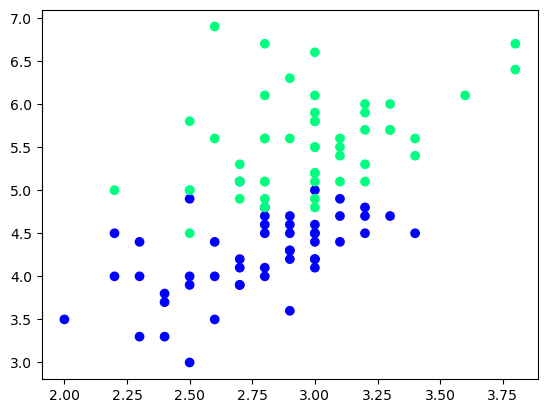

In [16]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [54]:
# Taking only 10 rows for the training

df=df.sample(100)
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [53]:
df_train.shape

(10, 3)

In [55]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [56]:
X_test

array([[2.8, 5.6],
       [2.5, 5.8],
       [3. , 4.6],
       [3. , 4.5],
       [3.8, 6.7]])

In [21]:
y_test

array([2, 1, 1, 1, 1])

# Case 1 Bagging

In [46]:
#Data for Tree 1

df_bag=df_train.sample(8,replace=True)

X=df_bag.iloc[:0:2]
y=df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
113,2.5,5.0,2
53,2.3,4.0,1
50,3.2,4.7,1
138,3.0,4.8,2
53,2.3,4.0,1
76,2.8,4.8,1
53,2.3,4.0,1
98,2.5,3.0,1


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [57]:
dt_bag1=DecisionTreeClassifier()
dt_bag1.fit(X,y)
plot_tree(dt_bag1)
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.

In [48]:
def evaluate(clf,X,y):
    clf.fi(X,y)
    plot_tree(clf)
    plt.show()
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [49]:
evaluate(dt_bag1,X,y)

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.